#PERSIAPAN

In [ ]:
!pip install Wordcloud
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Text Mining/mobil_listrik.csv')
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


#DATA UNDERSTANDING

CEK TIPE DATA

In [ ]:
data.dtypes

nama_akun        object
tanggal          object
text_cleaning    object
sentimen         object
dtype: object

CEK BARIS COLUMN

In [ ]:
data.shape

(1517, 4)

Cek Missing Value

In [ ]:
data.isnull().sum()

nama_akun        1
tanggal          0
text_cleaning    2
sentimen         0
dtype: int64

Hapus Missing Value

In [ ]:
data = data.dropna()
data.isnull().sum()

nama_akun        0
tanggal          0
text_cleaning    0
sentimen         0
dtype: int64

Cek Duplikasi data

In [ ]:
data.duplicated().sum()

0

Cek Deskripsi Data

In [ ]:
data.describe()

,nama_akun,tanggal,text_cleaning,sentimen
count,1514,1514,1514,1514
unique,1513,1511,1513,3
top,Albert,2023-06-06 14:02:09+00:00,mahal,negatif
freq,2,2,2,868


#Preprocessing Text

In [ ]:
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


Hilangkan var. id_komentar

In [ ]:
data = data.drop(columns= 'id_komentar')
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


##CASE FOLDING

**Mengubah semua huruf jadi huruf kecil (lower)**

In [ ]:
#mengubah teks menjadi lower teks
data['text_cleaning'] = data['text_cleaning'].str.lower()
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


**Menghilangkan angka dari kolom text_cleaning**

In [ ]:
# Menghilangkan angka dari kolom text_cleaning
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: re.sub(r'\d+', '', x))

print(data)

                 nama_akun                    tanggal  \
0                  Sqn Ldr  2023-08-06 12:54:49+00:00   
1               lushen ace  2023-08-04 12:16:23+00:00   
2          Fatih Al-Ayyubi  2023-08-04 10:17:57+00:00   
3                yp office  2023-08-04 08:29:54+00:00   
4            Lembur Kuring  2023-08-04 07:55:37+00:00   
...                    ...                        ...   
1512         Fish aquspace  2022-09-19 12:30:44+00:00   
1513           Elias Panai  2022-09-19 12:27:18+00:00   
1514  Mikhanalont Horassss  2022-09-19 12:23:06+00:00   
1515         ANI ANI SOFIE  2022-09-19 11:48:39+00:00   
1516               La Bold  2022-09-19 11:41:32+00:00   

                                          text_cleaning sentimen  
0     saran sih bikin   harga ionic sama kayak brio ...  positif  
1     problem subsidi kualitas diturunin harga dinai...  negatif  
2     baik kualitas kembang dulu baik kualitas motor...  positif  
3          model jelek kwalitas buruk harga mah

**Menghapus tanda baca**

In [ ]:
# 3. Menghapus tanda baca

data['text_cleaning'] = data['text_cleaning'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(data.head())

         nama_akun                    tanggal  \
0          Sqn Ldr  2023-08-06 12:54:49+00:00   
1       lushen ace  2023-08-04 12:16:23+00:00   
2  Fatih Al-Ayyubi  2023-08-04 10:17:57+00:00   
3        yp office  2023-08-04 08:29:54+00:00   
4    Lembur Kuring  2023-08-04 07:55:37+00:00   

                                       text_cleaning sentimen  
0  saran sih bikin   harga ionic sama kayak brio ...  positif  
1  problem subsidi kualitas diturunin harga dinai...  negatif  
2  baik kualitas kembang dulu baik kualitas motor...  positif  
3       model jelek kwalitas buruk harga mahal croot  negatif  
4  syarat   ngaco woy anak muda   blom punya ruma...  negatif  


**Menghapus whitespace (karakter kosong)**

In [ ]:
# 4. Menghapus whitespace (karakter kosong)
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: x.strip())
print(data.head())

         nama_akun                    tanggal  \
0          Sqn Ldr  2023-08-06 12:54:49+00:00   
1       lushen ace  2023-08-04 12:16:23+00:00   
2  Fatih Al-Ayyubi  2023-08-04 10:17:57+00:00   
3        yp office  2023-08-04 08:29:54+00:00   
4    Lembur Kuring  2023-08-04 07:55:37+00:00   

                                       text_cleaning sentimen  
0  saran sih bikin   harga ionic sama kayak brio ...  positif  
1  problem subsidi kualitas diturunin harga dinai...  negatif  
2  baik kualitas kembang dulu baik kualitas motor...  positif  
3       model jelek kwalitas buruk harga mahal croot  negatif  
4  syarat   ngaco woy anak muda   blom punya ruma...  negatif  


##Normalisasi

In [ ]:

# Kamus normalisasi
norm = {
    "dgn": "dengan",
    "gue": "saya",
    "ngaco": "sembarangan",
    "kwalitas": "kualitas",
    "blom": "belum",
    "jt" : "juta",
    "ev" : "mobil listrik",
    "lom" : "belum"
}

# Fungsi normalisasi
def normalisasi_kata(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text



# Melakukan normalisasi pada setiap kalimat
# Contoh penggunaan:
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: normalisasi_kata(x))


data.head()


,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif


CEK KATA YANG SUDAH DI NORMALISASI APAKAH MASIH ADA ATAU TIDAK

In [ ]:
# Mencari kata 'jt' dalam kolom 'text_cleaning'
result_jt = data[data['text_cleaning'].str.contains('ev')]

# Menampilkan hasil pencarian
print(result_jt)


Empty DataFrame
Columns: [nama_akun, tanggal, text_cleaning, sentimen]
Index: []


##Filtering

STOPWORD : MENGHILANGKAN KATA penghubung (dan, yang, di,..)

In [ ]:
#stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover,ArrayDictionary

In [ ]:
more_stop_word = []

# Mendapatkan daftar stop words
stop_words = StopWordRemoverFactory().get_stop_words()

# Membuat sebuah array baru dari daftar stop words
new_array = ArrayDictionary(stop_words)

# Membuat objek StopWordRemover dengan array baru
stop_words_remorver_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stop words dari teks
def stopword(str_text):
  str_text = stop_words_remorver_new.remove(str_text)
  return str_text



In [ ]:
# Menggunakan fungsi untuk membersihkan kolom 'text_cleaning' di DataFrame 'data'
data['text_cleaning'] = data['text_cleaning'].apply(lambda x: stopword(x))
data.head()


,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif


##Tokenisasi

In [ ]:
tokenized = data['text_cleaning'].apply(lambda x:x.split())
tokenized

0       [saran, sih, bikin, harga, ionic, sama, kayak,...
1       [problem, subsidi, kualitas, diturunin, harga,...
2       [baik, kualitas, kembang, dulu, baik, kualitas...
3       [model, jelek, kualitas, buruk, harga, mahal, ...
4       [syarat, sembarangan, woy, anak, muda, punya, ...
                              ...                        
1512    [apa, kabar, padahal, negri, luar, biasa, negara]
1513    [antar, anak, sekolah, antar, bantu, pasar, kl...
1514                               [esemka, bangga, solo]
1515    [cerdas, orang, hny, dn, pasar, jln, x, da, gi...
1516    [niat, beli, mobil, listrik, murah, malah, iku...
Name: text_cleaning, Length: 1514, dtype: object

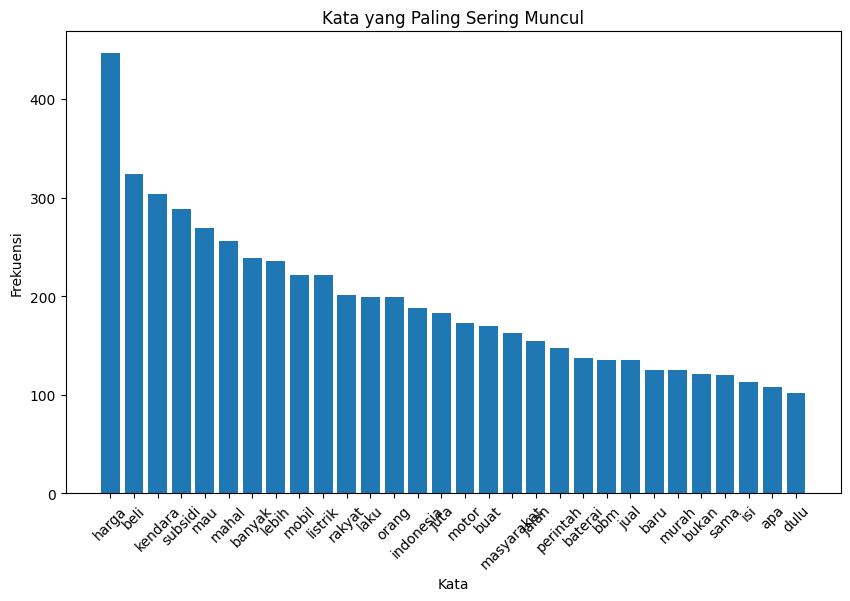

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Menggabungkan semua list token menjadi satu list
all_words = [word for sentence in tokenized for word in sentence]

# Menghitung frekuensi kemunculan kata
word_freq = Counter(all_words)

# Mengambil kata-kata yang paling sering muncul
common_words = word_freq.most_common(30)  # Ubah 10 sesuai kebutuhan

# Memisahkan kata dan frekuensinya
words, frequencies = zip(*common_words)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata yang Paling Sering Muncul')
plt.xticks(rotation=45)
plt.show()


##Stemming (Merubah kata menjadi kata dasar)

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
    do.append(' ')  # Tambahkan spasi

  d_clean = []
  d_clean = "".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

saran sih bikin harga ionic sama kayak brio insya alloh laris manis 
problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi inflasi paling gede 
baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang 
model jelek kualitas buruk harga mahal croot 
syarat sembarang woy anak muda punya rumah jd umkm bukan kur dapet sembarang sia deui sia deui nu narima subsidi teh ari aing iraha 
harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi 
mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas 
proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu tehnologi baru sabar 

In [ ]:
# Mencari kata 'jt' dalam data setelah stemming
result_jt = [text for text in tokenized if 'ev' in text]

# Menampilkan hasil pencarian
print(result_jt)

[]


Simpan kedalam CSV

In [ ]:
tokenized.to_csv('/content/drive/MyDrive/Text Mining/mobil_clean1.csv', index = False)

#Pembuatan Model (bisa mulai dari sini kalo mau testing)

Panggil data yang sudah di cleaning

In [ ]:
data_clean = pd.read_csv('/content/drive/MyDrive/Text Mining/mobil_clean1.csv')
data_clean.head()

,text_cleaning
0,saran sih bikin harga ionic sama kayak brio in...
1,problem subsidi kualitas diturunin harga dinai...
2,baik kualitas kembang dulu baik kualitas motor...
3,model jelek kualitas buruk harga mahal croot
4,syarat sembarang woy anak muda punya rumah jd ...


Penggabungan 2 Atribut Data

In [ ]:

atribut2 = pd.read_csv('/content/drive/MyDrive/Text Mining/mobil_listrik.csv')
atribut1 = pd.read_csv('/content/drive/MyDrive/Text Mining/mobil_clean1.csv')

att2 = atribut2['sentimen']

data_clean = pd.concat((atribut1, att2), axis = 1)
data_clean.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kualitas buruk harga mahal croot,negatif
4,syarat sembarang woy anak muda punya rumah jd ...,negatif


In [ ]:
data_clean

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,problem subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kualitas buruk harga mahal croot,negatif
4,syarat sembarang woy anak muda punya rumah jd ...,negatif
...,...,...
1512,cerdas orang hny dn pasar jln x da gimana kota...,negatif
1513,niat beli mobil listrik murah malah ikut dinai...,negatif
1514,NaN,positif
1515,NaN,netral


Menghapus baris dengan nilai teks yang hilang

In [ ]:
data_clean = data_clean.dropna()

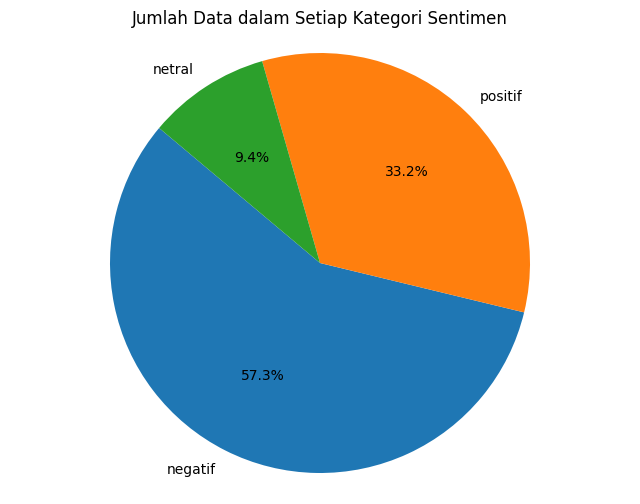

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data dalam setiap kategori sentimen
sentimen_counts = data_clean['sentimen'].value_counts()

# Menyiapkan data untuk visualisasi
labels = sentimen_counts.index
values = sentimen_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Data dalam Setiap Kategori Sentimen')
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.show()


Menduplikasi data berdasarkan 2 kondisi

In [ ]:
# DataFrame dengan nilai netral
data_clean_full= data_clean.copy()


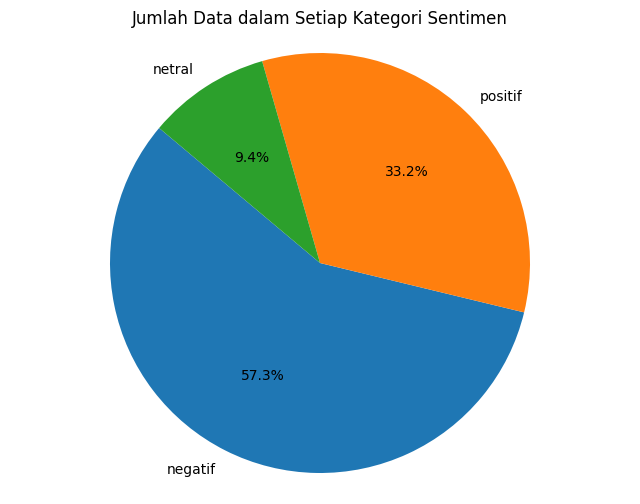

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data dalam setiap kategori sentimen
sentimen_counts = data_clean_full['sentimen'].value_counts()

# Menyiapkan data untuk visualisasi
labels = sentimen_counts.index
values = sentimen_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Data dalam Setiap Kategori Sentimen')
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.show()


In [ ]:
# DataFrame tanpa nilai netral
data_clean_noneutral = data_clean[data_clean['sentimen'] != 'netral'].copy()


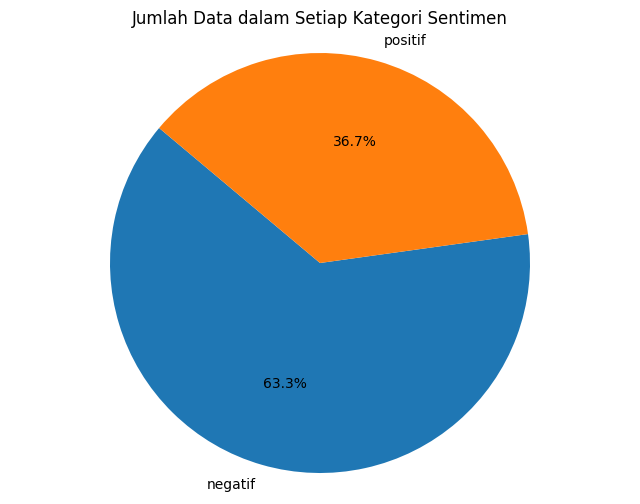

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data dalam setiap kategori sentimen
sentimen_counts = data_clean_noneutral['sentimen'].value_counts()

# Menyiapkan data untuk visualisasi
labels = sentimen_counts.index
values = sentimen_counts.values

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Data dalam Setiap Kategori Sentimen')
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.show()


##Transformasi

Karena akan menggunakan naive bayes, maka value harus diubah ke 0 dan 1

In [ ]:
data_clean_noneutral = data_clean_noneutral.replace({'positif' :1, 'negatif' :0})
data_clean_noneutral.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,1
1,problem subsidi kualitas diturunin harga dinai...,0
2,baik kualitas kembang dulu baik kualitas motor...,1
3,model jelek kualitas buruk harga mahal croot,0
4,syarat sembarang woy anak muda punya rumah jd ...,0


##VISUALISASI KATA

In [ ]:
data_negatif = data_clean_noneutral [data_clean_noneutral['sentimen'] == 0]
data_positif = data_clean_noneutral [data_clean_noneutral['sentimen'] == 1]

###VISUALISASI KATA NEGATIF

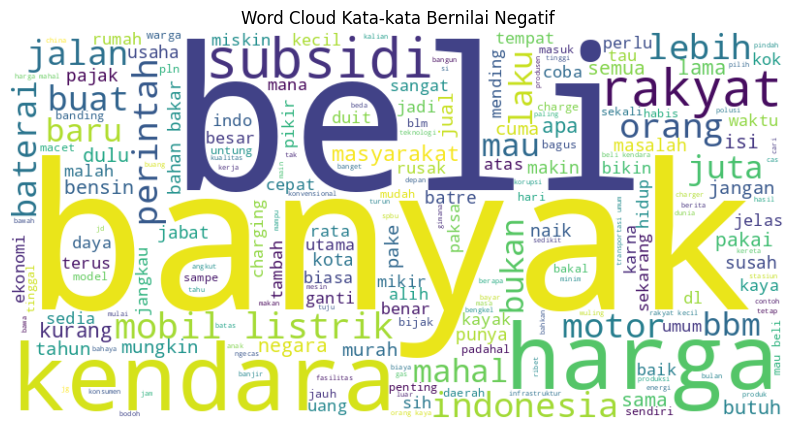

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Menggabungkan semua teks yang memiliki sentimen negatif menjadi satu teks
teks_negatif = ' '.join(data_negatif['text_cleaning'].tolist())

# Pra-pemrosesan teks (opsional: sesuaikan dengan kebutuhan Anda)
# Contoh pra-pemrosesan: tokenisasi dan penghapusan stopwords
# stopwords_indonesia = set(stopwords.words('indonesian'))
# words = word_tokenize(teks_negatif.lower())
# words = [word for word in words if word not in stopwords_indonesia]

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_negatif)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata-kata Bernilai Negatif')
plt.show()


###VISUALISASI KATA POSITIF

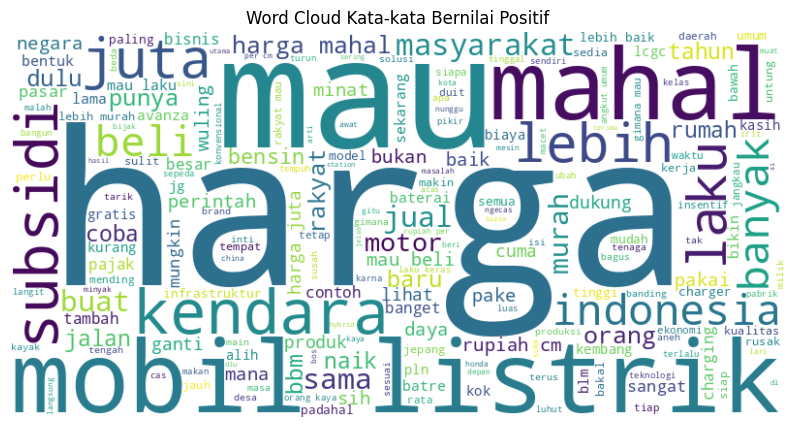

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Menggabungkan semua teks yang memiliki sentimen negatif menjadi satu teks
teks_positif = ' '.join(data_positif['text_cleaning'].tolist())

# Pra-pemrosesan teks (opsional: sesuaikan dengan kebutuhan Anda)
# Contoh pra-pemrosesan: tokenisasi dan penghapusan stopwords
# stopwords_indonesia = set(stopwords.words('indonesian'))
# words = word_tokenize(teks_negatif.lower())
# words = [word for word in words if word not in stopwords_indonesia]

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks_positif)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata-kata Bernilai Positif')
plt.show()


Menghitung jumlah kata positif dan negatif

In [ ]:
data_clean_noneutral['sentimen'].value_counts()

0    868
1    503
Name: sentimen, dtype: int64

###Visualisasi pada nilai sentiment

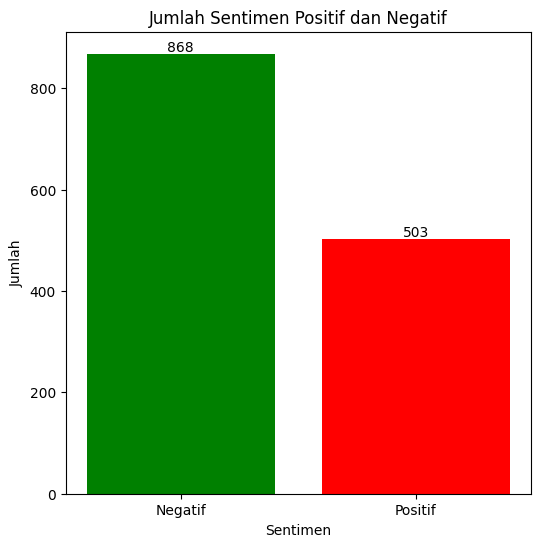

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif dan negatif
jumlah_sentimen = data_clean_noneutral['sentimen'].value_counts()

# Membuat bar chart
plt.figure(figsize=(6, 6))
plt.bar(jumlah_sentimen.index, jumlah_sentimen.values, color=['green', 'red'])

# Memberi label pada sumbu x dan y
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Sentimen Positif dan Negatif')

# Memberi label pada sumbu x untuk nilai sentimen
plt.xticks([0, 1], ['Negatif', 'Positif'])

# Menampilkan nilai di atas bar chart
for i, value in enumerate(jumlah_sentimen.values):
    plt.text(i, value + 5, str(value), ha='center')

# Menampilkan bar chart
plt.show()


#Data Prep

**SPLIT DATA**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (text_cleaning) dan target (sentimen)
X = data_clean_noneutral['text_cleaning']
y = data_clean_noneutral['sentimen']

# Memisahkan data menjadi bagian pelatihan (85%) dan pengujian (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Menampilkan jumlah data pada setiap bagian
print("Jumlah data pada data pelatihan:", len(X_train))
print("Jumlah data pada data pengujian:", len(X_test))


Jumlah data pada data pelatihan: 1165
Jumlah data pada data pengujian: 206


##Mengubah nilai teks menjadi angka

kedua CountVectorizer dan TfidfVectorizer memiliki fungsi untuk mengubah kata-kata menjadi representasi angka agar bisa digunakan dalam model machine learning. Proses ini dikenal sebagai vektorisasi teks. Mereka mengonversi teks menjadi representasi numerik yang bisa dipahami oleh algoritma machine learning.

##Menggunakan count vectorizer (tutorial yt)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Melakukan vektorisasi pada data pelatihan dan pengujian
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Contoh: Melihat dimensi vektor setelah vektorisasi
print("Dimensi vektor X_train setelah vektorisasi:", X_train_vec.shape)
print("Dimensi vektor X_test setelah vektorisasi:", X_test_vec.shape)


Dimensi vektor X_train setelah vektorisasi: (1096, 3194)
Dimensi vektor X_test setelah vektorisasi: (275, 3194)


In [ ]:
#Melakukan oversampling menggunakan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

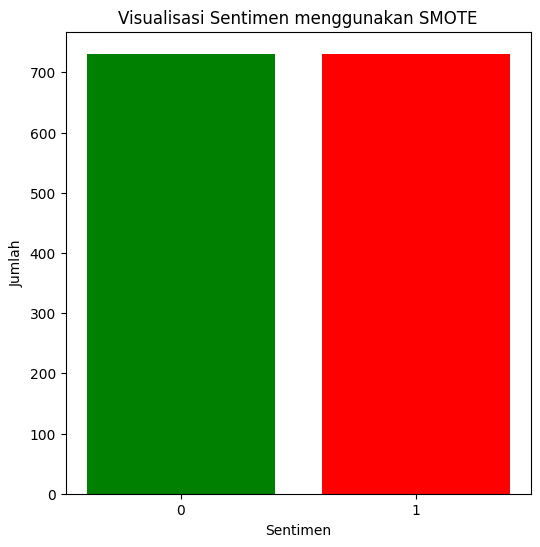

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif dan negatif
jumlah_sentimen = y_train_resampled.value_counts()

# Membuat bar chart
plt.figure(figsize=(6, 6))
plt.bar(jumlah_sentimen.index, jumlah_sentimen.values, color=['green', 'red'])

# Memberi label pada sumbu x dan y
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen menggunakan SMOTE')

# Memberi label pada sumbu x untuk nilai sentimen
plt.xticks(jumlah_sentimen.index, [0, 1])



# Menampilkan bar chart
plt.show()


Modeling

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_vec)

EVALUASI MODEL

In [ ]:
from sklearn.metrics import accuracy_score, classification_report  # Pastikan untuk mengimpor classification_report



# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Akurasi Model naive Bayes: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)  # Menggunakan variabel classification_rep


Akurasi Model naive Bayes:  0.7527272727272727

Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.76      0.88      0.82       173
     positif       0.72      0.54      0.62       102

    accuracy                           0.75       275
   macro avg       0.74      0.71      0.72       275
weighted avg       0.75      0.75      0.74       275



##Menggunakan TDIF vectorizer (Pakai ini untuk Case ini)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan vektorisasi pada data pelatihan dan pengujian
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Contoh: Melihat dimensi vektor setelah vektorisasi
print("Dimensi vektor X_train setelah vektorisasi:", X_train_tfidf.shape)
print("Dimensi vektor X_test setelah vektorisasi:", X_test_tfidf.shape)


Dimensi vektor X_train setelah vektorisasi: (1165, 3303)
Dimensi vektor X_test setelah vektorisasi: (206, 3303)


menangani oversampling menggunakan SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique)** adalah salah satu metode oversampling yang digunakan dalam penanganan ketidakseimbangan kelas pada dataset. Oversampling adalah teknik yang digunakan untuk menangani situasi di mana kelas mayoritas memiliki lebih banyak sampel daripada kelas minoritas dalam dataset. SMOTE khususnya digunakan untuk menangani ketidakseimbangan kelas dengan cara menciptakan sampel sintetis dari kelas minoritas untuk menyamakan jumlah sampel antara kelas mayoritas dan minoritas.

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi objek SMOTE
smote = SMOTE(random_state=42)

# Melakukan oversampling pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Menggunakan shape untuk mendapatkan jumlah baris (sampel) setelah SMOTE
print("Jumlah sampel setelah penerapan SMOTE:", X_train_resampled.shape[0])



Jumlah sampel setelah penerapan SMOTE: 1462


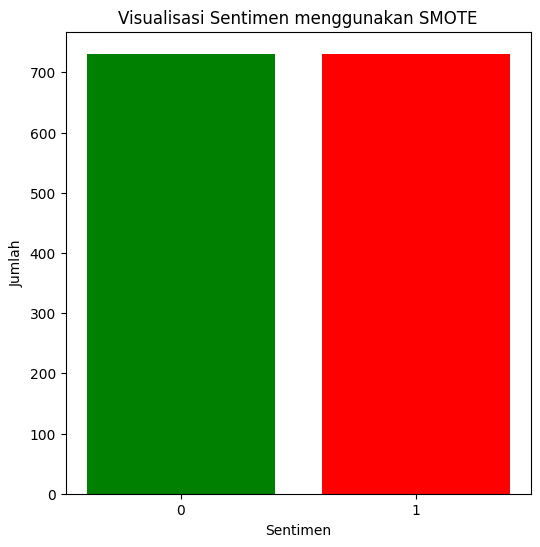

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif dan negatif
jumlah_sentimen = y_train_resampled.value_counts()

# Membuat bar chart
plt.figure(figsize=(6, 6))
plt.bar(jumlah_sentimen.index, jumlah_sentimen.values, color=['green', 'red'])

# Memberi label pada sumbu x dan y
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen menggunakan SMOTE')

# Memberi label pada sumbu x untuk nilai sentimen
plt.xticks(jumlah_sentimen.index, [0, 1])



# Menampilkan bar chart
plt.show()


**Modeling**

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:


y_pred = naive_bayes.predict(X_test_tfidf)


**Evaluasi Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, target_names = ['negatif', 'positif'])

print("Akurasi Model naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n ", classification_report)

Akurasi Model naive Bayes :  0.7621359223300971

Laporan Klasifikasi :
                precision    recall  f1-score   support

     negatif       0.85      0.78      0.81       137
     positif       0.62      0.72      0.67        69

    accuracy                           0.76       206
   macro avg       0.74      0.75      0.74       206
weighted avg       0.77      0.76      0.77       206



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Misal y_test adalah nilai sebenarnya dan y_pred adalah nilai yang diprediksi oleh model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[75 16]
 [ 9 38]]


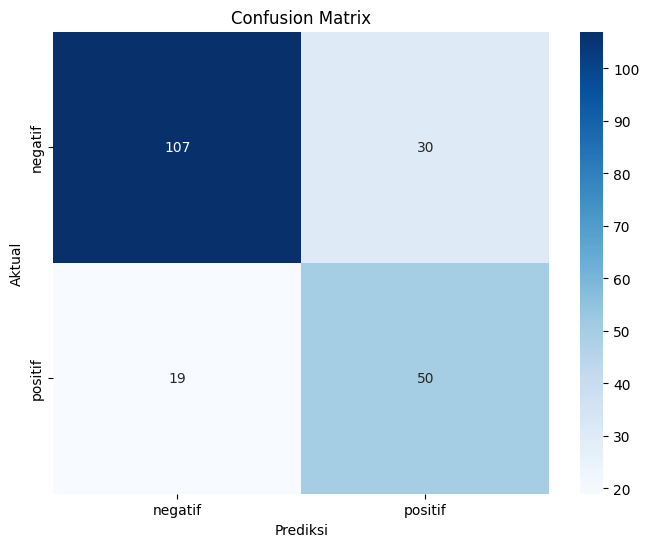

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negatif', 'positif'], yticklabels=['negatif', 'positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


**Testing**

In [ ]:
new_text = input("\nMasukan teks baru : ")
new_text_vec = tfidf_vectorizer.transform([new_text]) #parameter ini diambil pada saat inisiasi dgn tdif vectorizer
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] ==1 :
  sentiment_label ='positif'
elif predicted_sentimen[0] ==0 :
  sentiment_label ='negatif'

print("Hasil Analisis Sentimen untuk Teks Baru : ", sentiment_label)


Masukan teks baru : mobil listrik adalah solusi terbaik untuk kenaikan bbm
Hasil Analisis Sentimen untuk Teks Baru :  positif
